In [72]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [73]:
##Import data
##Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)
df = pd.read_csv('input.csv')

In [74]:
#Training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_train_test(test_size=0.35):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"],axis=1)
    X = pd.get_dummies(X,sparse=True) # onr-hot编码
    X.drop(X.columns[X.std() == 0],axis=1,inplace=True)
    return train_test_split(X,y,test_size=test_size,random_state=SEED)

xtrain,xtest,ytrain,ytest = get_train_test()

# A look at the data
print("\n Example data:")
df.head()


 Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


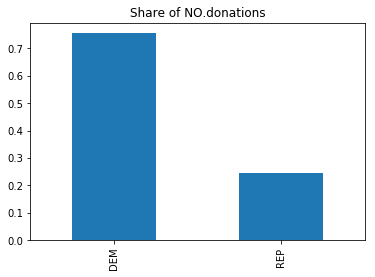

In [75]:
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind='bar',title='Share of NO.donations')
plt.show()

# 集成  


## 通过决策树集成

In [79]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz

def print_graph(clf,feature_names):
    graph = export_graphviz(
        clf,
        label = "root",
        proportion = True,
        impurity = False,
        out_file = None,
        feature_names = feature_names,
        class_names = {0:"D",1:"R"},
        filled = True,
        rounded = True
    )
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

在训练数据上用决策树拟合一个节点（决策规则），查看它在测试集上的性能

In [80]:
t1 = DecisionTreeClassifier(max_depth=1,random_state=SEED)
t1.fit(xtrain,ytrain)
p = t1.predict_proba(xtest)[:,1]
print("Decision tree ROC-AUC score:%.3f" % roc_auc_score(ytest,p))
print_graph(t1,xtrain.columns)

Decision tree ROC-AUC score:0.671


InvocationException: GraphViz's executables not found